<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

In [3]:
print(df.head())
print(df.shape)
print(df.info())
print(df.isnull().sum())
print(df.describe())

   Respondent                      MainBranch Hobbyist  \
0           4  I am a developer by profession       No   
1           9  I am a developer by profession      Yes   
2          13  I am a developer by profession      Yes   
3          16  I am a developer by profession      Yes   
4          17  I am a developer by profession      Yes   

                                         OpenSourcer  \
0                                              Never   
1                         Once a month or more often   
2  Less than once a month but more than once per ...   
3                                              Never   
4  Less than once a month but more than once per ...   

                                          OpenSource          Employment  \
0  The quality of OSS and closed source software ...  Employed full-time   
1  The quality of OSS and closed source software ...  Employed full-time   
2  OSS is, on average, of HIGHER quality than pro...  Employed full-time   
3  The qua

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [13]:
!pip install scipy


     ---------------------------------------- 0.0/59.0 kB ? eta -:--:--
     ------ --------------------------------- 10.2/59.0 kB ? eta -:--:--
     ------------- ------------------------ 20.5/59.0 kB 165.2 kB/s eta 0:00:01
     ------------- ------------------------ 20.5/59.0 kB 165.2 kB/s eta 0:00:01
     -------------------------------- ----- 51.2/59.0 kB 238.1 kB/s eta 0:00:01
     -------------------------------------- 59.0/59.0 kB 222.5 kB/s eta 0:00:00
   ---------------------------------------- 0.0/42.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/42.2 MB 1.3 MB/s eta 0:00:33
   ---------------------------------------- 0.1/42.2 MB 1.8 MB/s eta 0:00:24
   ---------------------------------------- 0.4/42.2 MB 2.5 MB/s eta 0:00:17
    --------------------------------------- 0.7/42.2 MB 3.1 MB/s eta 0:00:14
    --------------------------------------- 1.0/42.2 MB 3.6 MB/s eta 0:00:12
   - -------------------------------------- 1.1/42.2 MB 3.4 MB/s eta 0:00:13
   

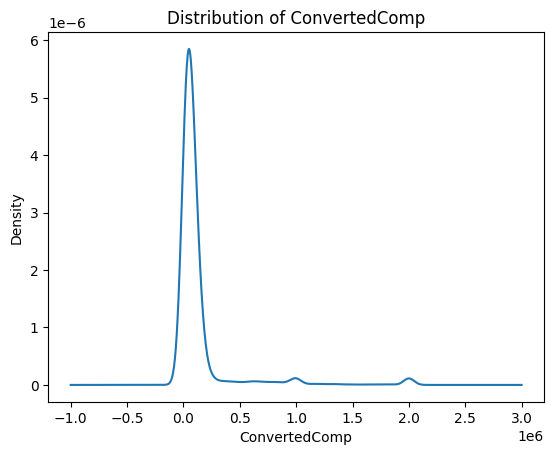

In [14]:
df['ConvertedComp'].dropna().plot(kind='kde')
plt.title('Distribution of ConvertedComp')
plt.xlabel('ConvertedComp')
plt.ylabel('Density')
plt.show()


Plot the histogram for the column `ConvertedComp`.


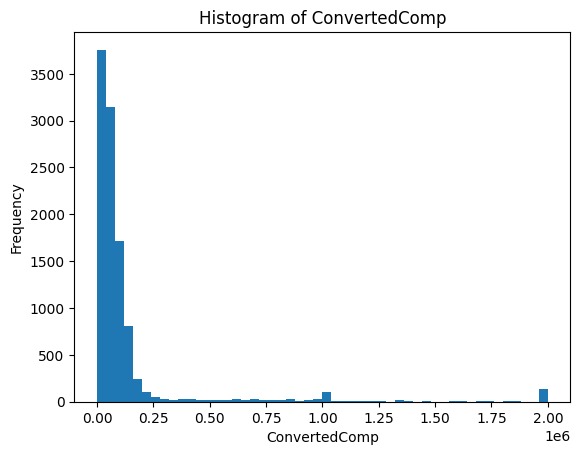

In [11]:
df['ConvertedComp'].dropna().plot(kind='hist', bins=50)
plt.title('Histogram of ConvertedComp')
plt.xlabel('ConvertedComp')
plt.ylabel('Frequency')
plt.show()


What is the median of the column `ConvertedComp`?


In [15]:
median_convertedcomp = df['ConvertedComp'].median()
median_convertedcomp


57745.0

How many responders identified themselves only as a **Man**?


In [16]:
man_count = df[df['Gender'] == 'Man'].shape[0]
man_count


10480

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [17]:
median_convertedcomp_woman = df[df['Gender'] == 'Woman']['ConvertedComp'].median()
median_convertedcomp_woman


57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [18]:
age_summary = df['Age'].describe(percentiles=[0.25, 0.5, 0.75])
five_number_summary = {
    'Minimum': age_summary['min'],
    'Q1': age_summary['25%'],
    'Median': age_summary['50%'],
    'Q3': age_summary['75%'],
    'Maximum': age_summary['max']
}
five_number_summary


{'Minimum': 16.0, 'Q1': 25.0, 'Median': 29.0, 'Q3': 35.0, 'Maximum': 99.0}

Plot a histogram of the column `Age`.


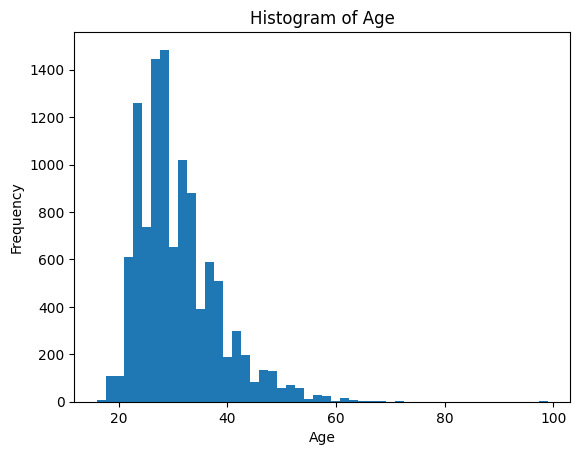

In [19]:
df['Age'].dropna().plot(kind='hist', bins=50)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


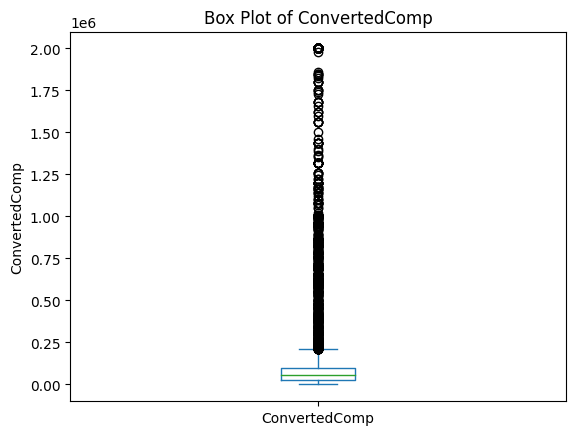

In [20]:
df['ConvertedComp'].plot(kind='box')
plt.title('Box Plot of ConvertedComp')
plt.ylabel('ConvertedComp')
plt.show()


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [21]:
q1 = df['ConvertedComp'].quantile(0.25)
q3 = df['ConvertedComp'].quantile(0.75)
iqr = q3 - q1
iqr


73132.0

Find out the upper and lower bounds.


In [22]:
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
lower_bound, upper_bound


(-82830.0, 209698.0)

Identify how many outliers are there in the `ConvertedComp` column.


In [23]:
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]
outlier_count = outliers.shape[0]
outlier_count


879

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [24]:
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [25]:
correlation = df_no_outliers.corr()['Age']
correlation


Respondent       0.002180
CompTotal        0.006337
ConvertedComp    0.401821
WorkWeekHrs      0.032032
CodeRevHrs      -0.012878
Age              1.000000
Name: Age, dtype: float64

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
